In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

In [ ]:
cap = cv2.VideoCapture()

for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

___

## **Data Preprocessing and Augmentation**

In [2]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
images = tf.data.Dataset.list_files("C:/Users/RoboticLab/Desktop/DeepFaceDetection/data/images/*.jpg")

In [26]:
images.as_numpy_iterator().next()

b'C:\\Users\\RoboticLab\\Desktop\\DeepFaceDetection\\data\\images\\cb8c12a8-a45c-11ef-ac60-2a1136d70be9.jpg'

In [99]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [28]:
images = images.map(load_image)

In [29]:
images.as_numpy_iterator().next()

array([[[153, 142, 120],
        [153, 142, 120],
        [154, 143, 121],
        ...,
        [173, 157, 141],
        [172, 156, 140],
        [171, 155, 139]],

       [[153, 142, 120],
        [153, 142, 120],
        [154, 143, 121],
        ...,
        [172, 156, 140],
        [171, 155, 139],
        [171, 155, 139]],

       [[152, 141, 119],
        [153, 142, 120],
        [154, 143, 121],
        ...,
        [171, 155, 139],
        [170, 154, 138],
        [170, 154, 138]],

       ...,

       [[242, 183, 151],
        [244, 185, 153],
        [245, 186, 154],
        ...,
        [100,  82,  46],
        [100,  82,  46],
        [100,  82,  46]],

       [[242, 182, 148],
        [243, 183, 149],
        [244, 184, 150],
        ...,
        [ 92,  72,  39],
        [ 92,  73,  40],
        [ 93,  74,  41]],

       [[240, 180, 146],
        [242, 182, 148],
        [245, 182, 149],
        ...,
        [ 84,  64,  31],
        [ 86,  67,  34],
        [ 88,  69,  36]]

In [30]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [31]:
image_generator = images.batch(4).as_numpy_iterator()

In [32]:
plot_images = image_generator.next()

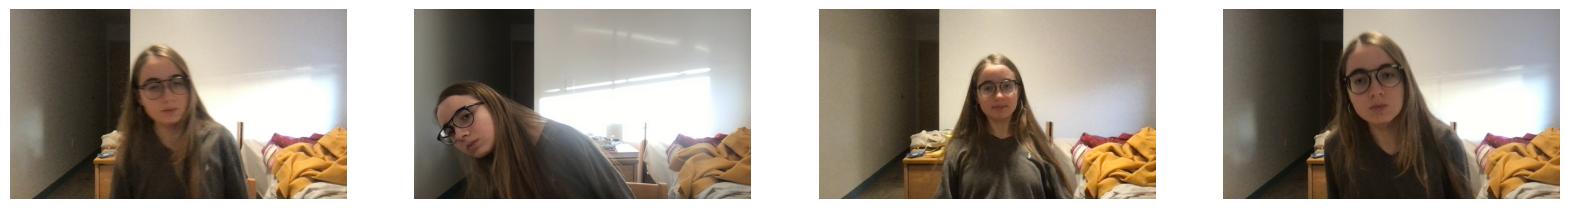

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    ax[idx].axis('off')
plt.show()

In [36]:
!mkdir "data/train/images"
!mkdir "data/train/labels"

In [37]:
!mkdir "data/val/images"
!mkdir "data/val/labels"

In [38]:
!mkdir "data/test/images"
!mkdir "data/test/labels"

In [50]:
import shutil
from glob import glob
from pathlib import Path

images = list(Path("data/images").glob("*.jpg"))
num_images = len(images)

train_split = 0.7
val_split = 0.5

len_train_images = int(num_images * train_split)
len_val_images = (num_images - len_train_images) // 2
len_test_images = num_images - (len_train_images + len_val_images)

print("Train images: {}".format(len_train_images))
print("Validation images: {}".format(len_val_images))
print("Test images: {}".format(len_test_images))

Train images: 83
Validation images: 18
Test images: 18


In [56]:
from random import sample
import os

train_images = sample(images, 83)

for i, img in enumerate(train_images):
    shutil.move(img, os.path.join("data", "train", "images"))
    print(f"{i}th image moved!")

0th image moved!
1th image moved!
2th image moved!
3th image moved!
4th image moved!
5th image moved!
6th image moved!
7th image moved!
8th image moved!
9th image moved!
10th image moved!
11th image moved!
12th image moved!
13th image moved!
14th image moved!
15th image moved!
16th image moved!
17th image moved!
18th image moved!
19th image moved!
20th image moved!
21th image moved!
22th image moved!
23th image moved!
24th image moved!
25th image moved!
26th image moved!
27th image moved!
28th image moved!
29th image moved!
30th image moved!
31th image moved!
32th image moved!
33th image moved!
34th image moved!
35th image moved!
36th image moved!
37th image moved!
38th image moved!
39th image moved!
40th image moved!
41th image moved!
42th image moved!
43th image moved!
44th image moved!
45th image moved!
46th image moved!
47th image moved!
48th image moved!
49th image moved!
50th image moved!
51th image moved!
52th image moved!
53th image moved!
54th image moved!
55th image moved!
56

In [58]:
images = list(Path("data/images").glob("*.jpg"))
val_images = sample(images, 18)

for i, img in enumerate(val_images):
    shutil.move(img, os.path.join("data", "val", "images"))
    print(f"{i}th image moved!")

0th image moved!
1th image moved!
2th image moved!
3th image moved!
4th image moved!
5th image moved!
6th image moved!
7th image moved!
8th image moved!
9th image moved!
10th image moved!
11th image moved!
12th image moved!
13th image moved!
14th image moved!
15th image moved!
16th image moved!
17th image moved!


In [59]:
images = list(Path("data/images").glob("*.jpg"))
test_images = sample(images, 18)

for i, img in enumerate(test_images):
    shutil.move(img, os.path.join("data", "test", "images"))
    print(f"{i}th image moved!")

0th image moved!
1th image moved!
2th image moved!
3th image moved!
4th image moved!
5th image moved!
6th image moved!
7th image moved!
8th image moved!
9th image moved!
10th image moved!
11th image moved!
12th image moved!
13th image moved!
14th image moved!
15th image moved!
16th image moved!
17th image moved!


In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [ ]:
import albumentations as alb
# for tensorflow 2.10 -> numpy<2, protobuf<3.20

In [79]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [80]:
import cv2
import os

img = cv2.imread(os.path.join('data','train', 'images','0ea88510-a45a-11ef-abf9-2a1136d70be9.jpg'))

In [81]:
type(img)

numpy.ndarray

In [82]:
img_height = img.shape[0]
img_width = img.shape[1]

In [83]:

import json

with open('C:/Users/RoboticLab/Desktop/DeepFaceDetection/data/train/labels/0ea88510-a45a-11ef-abf9-2a1136d70be9.json', 'r') as f:
    label = json.load(f)

In [84]:
label['shapes'][0]['points']

[[413.2142857142857, 305.8333333333333],
 [607.2619047619048, 557.0238095238095]]

In [85]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][1]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1] 

In [86]:
coords

[305.8333333333333, 305.8333333333333, 607.2619047619048, 557.0238095238095]

In [87]:
import numpy as np

coords = list(np.divide(coords, [img_width, img_height, img_width, img_height]))

In [88]:
coords

[0.23893229166666666,
 0.4247685185185185,
 0.47442336309523814,
 0.7736441798941799]

In [89]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [90]:
augmented['bboxes'][0][2]

1.0

In [91]:
augmented['bboxes']

[[0.5729629770914714, 0.25518516752454967, 1.0, 0.8133862898084853]]

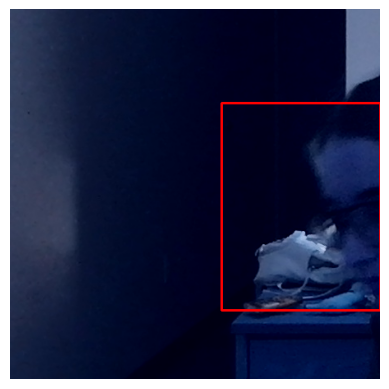

In [92]:
import matplotlib.pyplot as plt
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (255, 0, 0), 2)
plt.imshow(augmented['image'])
plt.axis('off')
plt.show()

In [93]:
!mkdir "aug_data/train/images"
!mkdir "aug_data/val/images"
!mkdir "aug_data/test/images"

In [94]:
!mkdir "aug_data/train/labels"
!mkdir "aug_data/val/labels"
!mkdir "aug_data/test/labels"

In [95]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [img_width,img_height,img_width,img_height]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

C:\Users\RoboticLab\AppData\Roaming\Python\Python310\site-packages\albumentations\core\bbox_utils.py:478: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)


In [97]:
import tensorflow as tf

In [100]:
train_images = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [101]:
test_images = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [102]:
val_images = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [103]:
train_images.as_numpy_iterator().next()

array([[[0.7221201 , 0.53572303, 0.3456495 ],
        [0.72610295, 0.5372549 , 0.34448528],
        [0.7318627 , 0.5387255 , 0.34166667],
        ...,
        [0.14607844, 0.1264706 , 0.11323529],
        [0.1526348 , 0.14050245, 0.12107843],
        [0.17536765, 0.15870099, 0.13664216]],

       [[0.7197304 , 0.5434436 , 0.36452207],
        [0.7175858 , 0.545527  , 0.37003675],
        [0.7137255 , 0.545527  , 0.36960784],
        ...,
        [0.14993873, 0.13033088, 0.11464461],
        [0.15980393, 0.14019608, 0.11752451],
        [0.175     , 0.1504902 , 0.12696078]],

       [[0.7041054 , 0.5540441 , 0.4071691 ],
        [0.7019608 , 0.55245095, 0.40980393],
        [0.6904412 , 0.5542892 , 0.41648284],
        ...,
        [0.15294118, 0.1254902 , 0.10196079],
        [0.15539216, 0.12794118, 0.10441177],
        [0.16029412, 0.13284314, 0.10147059]],

       ...,

       [[0.7406863 , 0.7563726 , 0.76029414],
        [0.7407476 , 0.75643384, 0.7603554 ],
        [0.7490196 , 0

In [104]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [106]:
train_labels = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [105]:
test_labels = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [107]:
val_labels = tf.data.Dataset.list_files('C:/Users/RoboticLab/Desktop/DeepFaceDetection/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [109]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.616 , 0.6665, 1.    , 1.    ], dtype=float16))

In [110]:
len(train_images), len(train_labels)

(5400, 5400)

In [111]:
len(test_images), len(test_labels)

(1260, 1260)

In [112]:
len(val_images), len(val_labels)

(1260, 1260)

In [113]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [114]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [115]:

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [121]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.2766, 0.2695, 0.777 ],
        [0.716 , 0.2922, 1.    , 0.856 ],
        [0.    , 0.3677, 0.143 , 0.743 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1572, 0.3752, 0.644 , 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1415, 0.2988, 0.5464, 0.738 ],
        [0.732 , 0.    , 1.    , 0.3982]], dtype=float16))

In [117]:
data_samples = train.as_numpy_iterator()

In [137]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


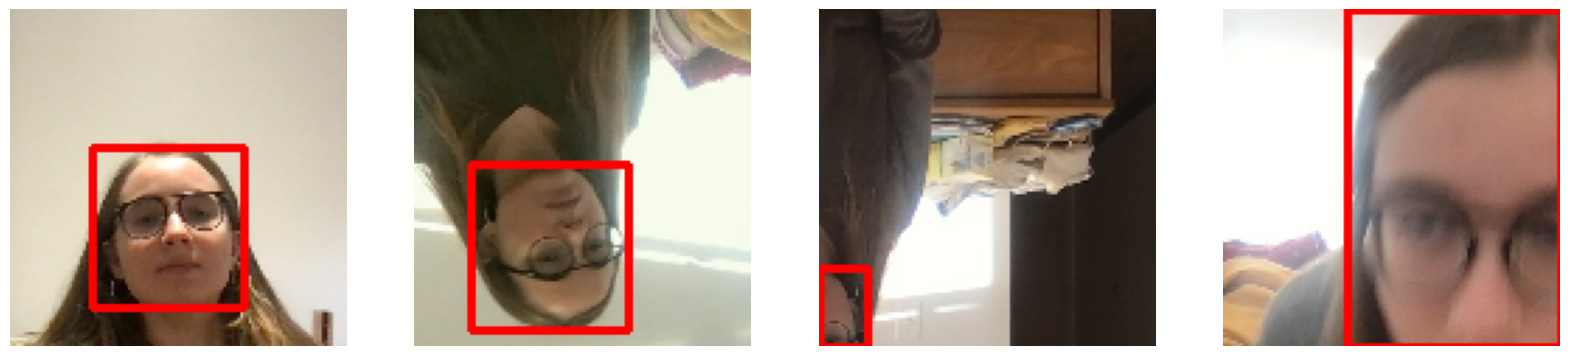

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    sample_image = sample_image.copy()  # Ensure the array is writable
    cv2.rectangle(sample_image, 
                tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                (255,0,0), 2)
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')

___

## **Build the Model**

In [139]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [140]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 27s 0us/step


In [141]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [142]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation="relu")(f1)
    class2 = Dense(1, activation="sigmoid")(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation="relu")(f2)
    regress2 = Dense(4, activation="sigmoid")(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [143]:
facetracker = build_model()

In [144]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [145]:
X, y = train.as_numpy_iterator().next()

In [146]:
X.shape

(8, 120, 120, 3)

In [147]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 13s 13s/step


In [148]:
classes, coords

(array([[0.7130474 ],
        [0.6526989 ],
        [0.64331716],
        [0.6959537 ],
        [0.69076437],
        [0.6240448 ],
        [0.6199369 ],
        [0.68704563]], dtype=float32),
 array([[0.53269595, 0.55789477, 0.6882751 , 0.5739811 ],
        [0.5505592 , 0.5412289 , 0.6968755 , 0.509948  ],
        [0.63696843, 0.4976872 , 0.7014455 , 0.54093975],
        [0.6458268 , 0.46505123, 0.64084864, 0.52670676],
        [0.50993747, 0.53493583, 0.67192227, 0.47430557],
        [0.569672  , 0.608855  , 0.69697976, 0.45235863],
        [0.402551  , 0.52226144, 0.6434346 , 0.567178  ],
        [0.6639563 , 0.5810213 , 0.8215705 , 0.54597896]], dtype=float32))

In [150]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1) / batches_per_epoch

In [151]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [152]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [153]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [154]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.7026043>

In [155]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.7026043>

In [156]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8278352>

In [157]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [158]:
model = FaceTracker(facetracker)

In [159]:
model.compile(opt, classloss, regressloss)

In [160]:
logdir = "logs"

In [161]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [163]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
675/675 [==============================] - 130s 167ms/step - total_loss: 0.6278 - class_loss: 0.1626 - regress_loss: 0.5465 - val_total_loss: 0.0230 - val_class_loss: 0.0066 - val_regress_loss: 0.0197
Epoch 2/10
675/675 [==============================] - 97s 130ms/step - total_loss: 0.2650 - class_loss: 0.0799 - regress_loss: 0.2250 - val_total_loss: 0.0675 - val_class_loss: 0.0354 - val_regress_loss: 0.0498
Epoch 3/10
675/675 [==============================] - 137s 175ms/step - total_loss: 0.1835 - class_loss: 0.0594 - regress_loss: 0.1538 - val_total_loss: 0.0325 - val_class_loss: 2.7912e-04 - val_regress_loss: 0.0324
Epoch 4/10
675/675 [==============================] - 177s 154ms/step - total_loss: 0.1133 - class_loss: 0.0364 - regress_loss: 0.0951 - val_total_loss: 0.9535 - val_class_loss: 0.3160 - val_regress_loss: 0.7955
Epoch 5/10
675/675 [==============================] - 99s 127ms/step - total_loss: 0.0962 - class_loss: 0.0291 - regress_loss: 0.0816 - val_total_los

In [164]:
hist.history

{'total_loss': [0.6716553568840027,
  0.1646200716495514,
  0.0790950208902359,
  0.058474618941545486,
  0.0216171033680439,
  0.08623729646205902,
  0.04826749116182327,
  0.03063534013926983,
  0.0050088148564100266,
  0.006221619900316],
 'class_loss': [0.18210884928703308,
  0.07831259071826935,
  0.00192340521607548,
  0.005169854499399662,
  0.0018182705389335752,
  0.006323871202766895,
  0.0018668700940907001,
  0.0003056349523831159,
  0.0010934248566627502,
  0.0005378118949010968],
 'regress_loss': [0.580600917339325,
  0.12546376883983612,
  0.07813331484794617,
  0.05588969215750694,
  0.02070796862244606,
  0.08307535946369171,
  0.047334056347608566,
  0.030482523143291473,
  0.004462102428078651,
  0.0059527140110731125],
 'val_total_loss': [0.022986626252532005,
  0.06750297546386719,
  0.032531868666410446,
  0.9535424113273621,
  0.002358025871217251,
  0.004161744378507137,
  0.007689339108765125,
  0.03250556439161301,
  0.0045283203944563866,
  0.0193348545581102

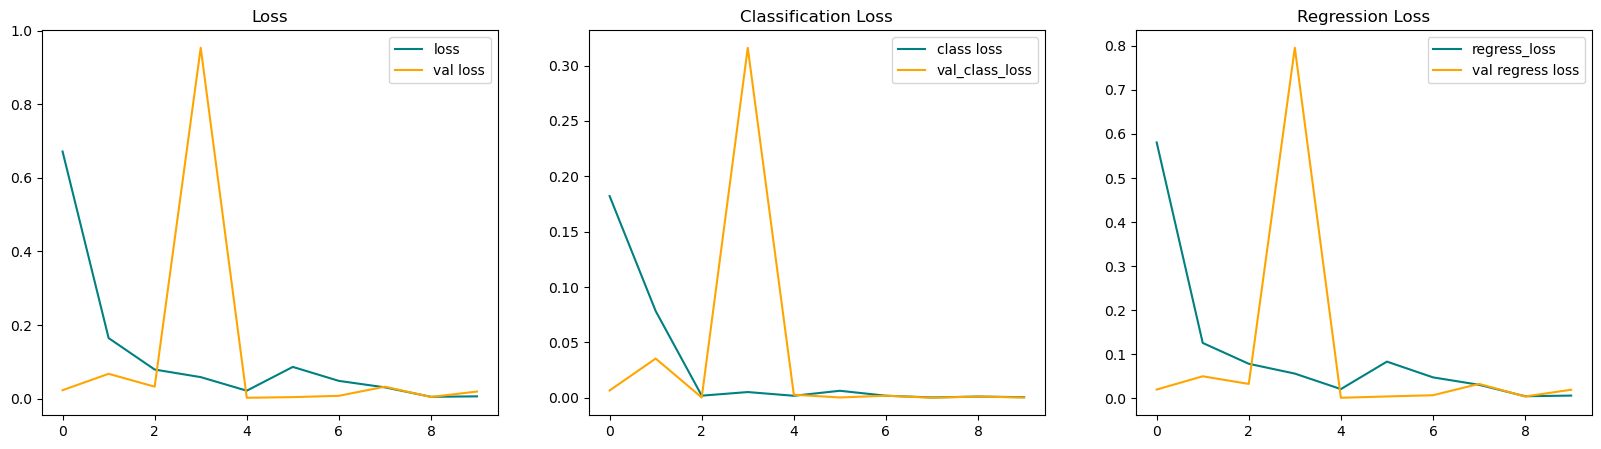

In [165]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

ax[0].plot(hist.history['total_loss'], color="teal", label="loss")
ax[0].plot(hist.history['val_total_loss'], color="orange", label="val loss")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color="teal", label="class loss")
ax[1].plot(hist.history['val_class_loss'], color="orange", label="val_class_loss")
ax[1].title.set_text("Classification Loss")
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color="teal", label="regress_loss")
ax[2].plot(hist.history['val_regress_loss'], color="orange", label="val regress loss")
ax[2].title.set_text("Regression Loss")
ax[2].legend()

plt.show()

In [166]:
test_data = test.as_numpy_iterator()

In [167]:
test_sample = test_data.next()

In [168]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


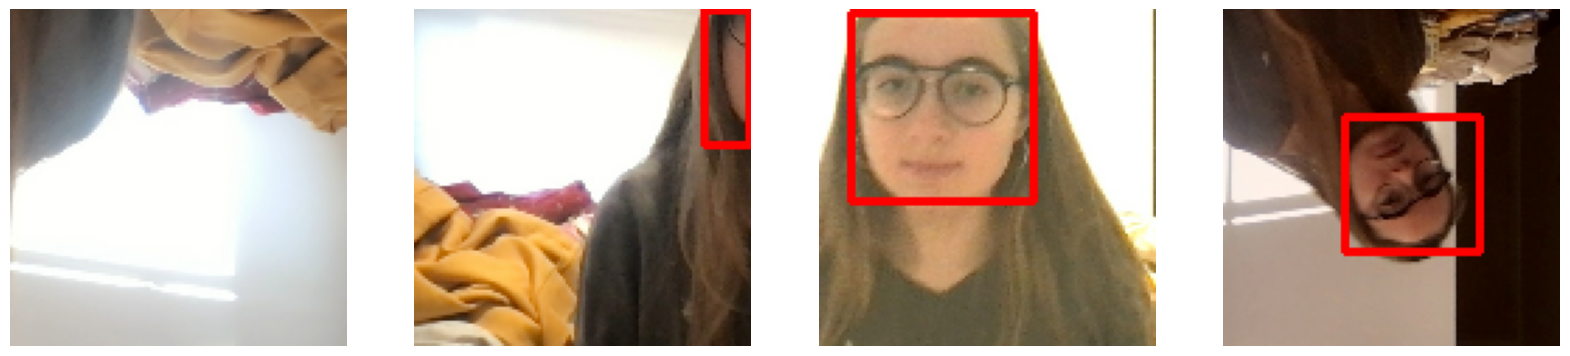

In [170]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    sample_image = sample_image.copy()

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                      (255, 0, 0), 2)
        
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')

In [188]:
facetracker.save("facetracker.h5")

In [189]:
facetracker = load_model('facetracker.h5')

In [193]:
facetracker.compile(opt, classloss, regressloss)

In [196]:
facetracker.evaluate(test_data.next()[0], verbose=1)

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - dense_1_loss: 0.0000e+00 - dense_3_loss: 0.0000e+00 - dense_1_localization_loss: 0.0000e+00 - dense_3_localization_loss: 0.0000e+00


[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
facetracker.compile(opt,)

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    _, frame = cap.read()
    frame = frame[50:500, 50:500, :]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))

    yhat = model.predict(np.expand_dims(resized/255.0, axis=0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()